<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/week-7/LogReg%2C_Random_Forest%2C_or_KNN_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [3]:
#Load Data
fpath = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/cancer.csv"
df = pd.read_csv(fpath)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Logistic Regression - Default

Test Scores:               precision    recall  f1-score   support

           B       0.99      0.98      0.98        89
           M       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



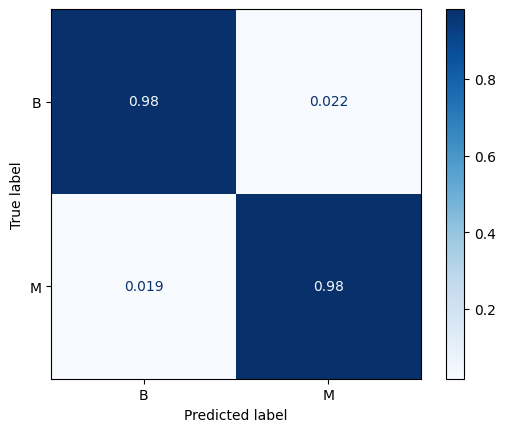

In [4]:
#State Features and Target
X = df.drop(columns="diagnosis")
y = df["diagnosis"]
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#Instatiate model and preprocessing
logreg = LogisticRegression(max_iter=100)
scaler = StandardScaler()
#Pipe and Fit
logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(X_train, y_train)
#Predict
train_preds = logreg_pipe.predict(X_train)
test_preds = logreg_pipe.predict(X_test)
#Evaluate
train_score = classification_report(y_train, train_preds)
test_score = classification_report(y_test, test_preds)
print(f"Test Scores: {test_score}")
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="true", cmap="Blues");

## Logistic Regression w/ GridSearchCV

In [5]:
#Getting params for GridSearch's param_grid
logreg_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

---

In [6]:
log_reg_pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver="liblinear"))
#State parameters for GridSearchCV
pipe_param_grid = {"logisticregression__C":[.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
                   "logisticregression__penalty":["l1","l2"]}
#Instatiate GridSearchCV
lg_grid_search = GridSearchCV(log_reg_pipe, pipe_param_grid)
#Fit and Train
lg_grid_search.fit(X_train, y_train)
#Examine the Best Parameters
print(lg_grid_search.best_params_)

{'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}


              precision    recall  f1-score   support

           B       0.99      0.98      0.98        89
           M       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



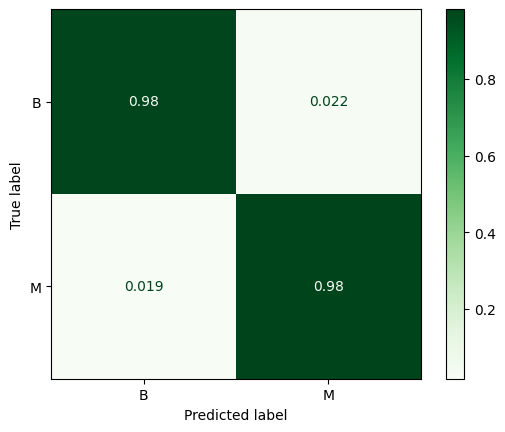

In [7]:
#Instantiate w/ the Best Params
log_reg2 = LogisticRegression(C=1, max_iter=1000, solver="liblinear", penalty="l2")
scaler = StandardScaler()
#Pipe and Fit
log_reg_pipe2 = make_pipeline(scaler, log_reg2)
log_reg_pipe2.fit(X_train, y_train)
#Predict
train_preds2 = log_reg_pipe2.predict(X_train)
test_preds2 = log_reg_pipe2.predict(X_test)
#Evaluate
print(classification_report(y_test, test_preds2))
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds2, normalize="true", cmap="Greens");

Which hyperparameters did you tune?
```
I tuned hyperparameter C and penalty
```
What values for those hyperparameters led to the best-tuned model?
```
The values from the default vs. tuned Logistic Regression were the same.
```

#K-Nearest Neighbors - Default

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        89
           M       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



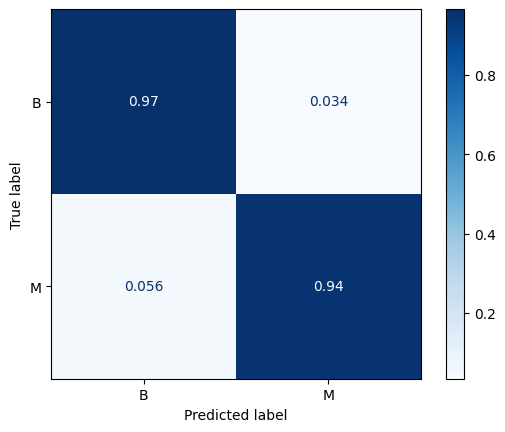

In [8]:
#Instantiate Model
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(scaler, knn)
#Fit and Predict
knn_pipe.fit(X_train, y_train)
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)
#Evaluate
print(classification_report(y_test, test_preds))
#Confusion Maxtrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="true", cmap="Blues");

## KNN w/ GridSearchCV

In [9]:
#Create KNN pipe
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

{'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 4, 'kneighborsclassifier__weights': 'uniform'}
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        89
           M       0.94      0.91      0.92        54

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



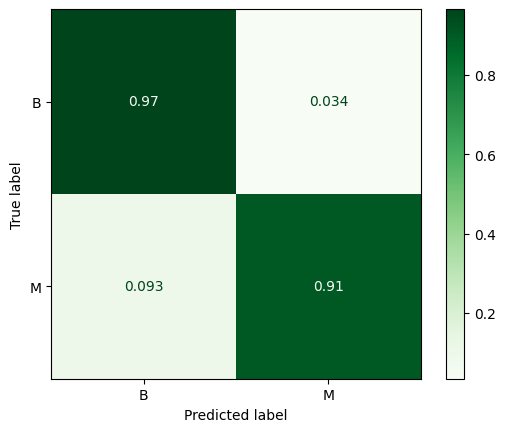

In [15]:
#Set Grid Dictionary
pipe_param_grid = {"kneighborsclassifier__n_neighbors":range(1,10),
                   "kneighborsclassifier__p":range(1,5),
                   "kneighborsclassifier__weights": ["uniform", "distance"]}
#Instantiate GridSearchCV
knn_grid_search = GridSearchCV(knn_pipe, pipe_param_grid)
#Fit and Predict
knn_grid_search.fit(X_train, y_train)
train_preds = knn_grid_search.predict(X_train)
test_preds = knn_grid_search.predict(X_test)
print(knn_grid_search.best_params_)
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="true", cmap="Greens");

Which hyperparameters did you tune?
```
I tuned n_neighbor, weights, and p.
```
What values for those hyperparameters led to the best-tuned model?
```
P to value of 4.
```

# Random Forest - Default

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        89
           M       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



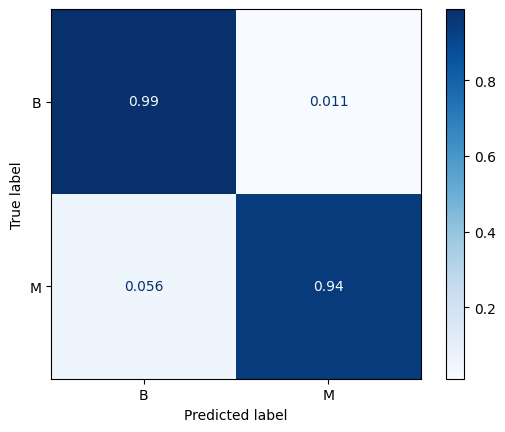

In [13]:
#Instantiate Model
rf = RandomForestClassifier(random_state=42)
#Fit the Data
rf.fit(X_train, y_train)
#Predict the Values for y
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)
#Evaluate Model Performance
print(classification_report(y_test, test_preds))
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="true", cmap="Blues");

## Random Forest w/ GridSearchCV

In [16]:
#Checking the params to adjust
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [37]:
#Instantiate Model & Set Grid Params
rf = RandomForestClassifier(random_state=42)
grid_params = {"max_depth":range(1,10),
               "min_samples_leaf": [3,15,20],
              "min_samples_split": [2, 10, 100]}
#Instantiage GridSearchCV
rf_grid_search = GridSearchCV(rf, grid_params)
#Fit
rf_grid_search.fit(X_train, y_train)
#Get the Best Param
rf_grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}

In [20]:
#Trying out different min_samples_leaf and min_samples_split
grid_params2 = {"max_depth":range(1,10),
                "min_samples_leaf":[1,2,3],
                "min_samples_split":[10, 15, 20, 25, 30]}
#Instatiate GridSearchCV
rf_grid_search = GridSearchCV(rf, grid_params2)
#Fit
rf_grid_search.fit(X_train, y_train)
#Get best params
rf_grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10}

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        89
           M       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



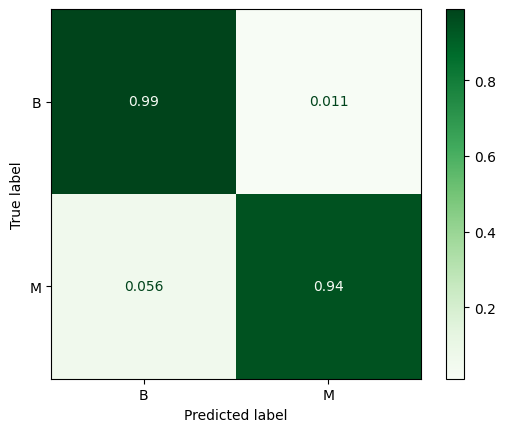

In [24]:
#Instantiate Model
rf = RandomForestClassifier(max_depth= 6, min_samples_leaf= 1, min_samples_split= 10, random_state=42)
#Fit
rf.fit(X_train, y_train)
#Predict
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)
#Evaluate
print(classification_report(y_test, test_preds))
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="true", cmap="Greens");

Which hyperparameters did you tune?
```
I tuned max_depth, min_samples_split, and min_samples_leaf.
```
What values for those hyperparameters led to the best-tuned model?
```
Adjusting the max_depth to 6 and min_sample_split to 10
```

What do 'false positives' and 'false negatives' mean for this problem? Which is worse?
```
False Negatives are more problematic (than False Positives) because these patients **should** be treated.
Usually with diaseases the earlier they are diagnosed the better chance of overcoming.
```
Which of your models would you recommend for production? Which metric or metrics did you use to decide that, and why?
```
The Logistic Regression model should be used for production due to having the best overall classification metrics
(recall, precision, accuracy, f1 score).
It has the lowest False Negative rates, consisting of 1% of misdiagnosis.
```
